# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
### Competed Problems: 
#    1 - yes
#    2 - yes
#    3 - yes
#    4 - maybe - add exmaple of transformation improvment 
#    5 - yes
#    6 - yes
#    7 - yes
#    8 - yes
#    9 - no - solution to improve needed
#    10 - yes
#    11 - yes
#    12 (extra credit)
###

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.ndimage import gaussian_filter

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

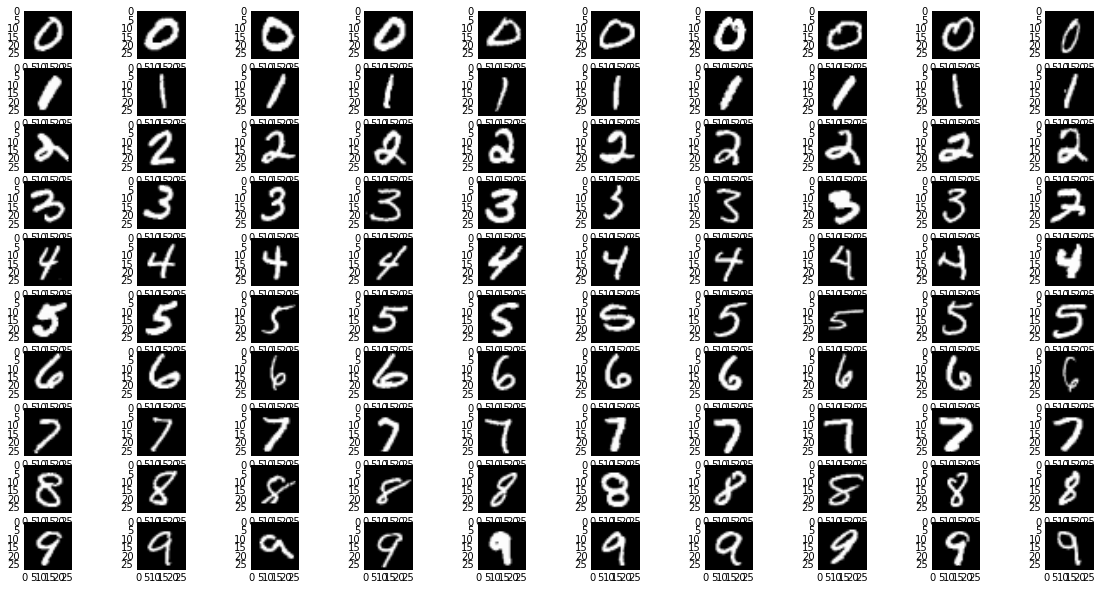

In [4]:
# def P1(num_examples=10):

def P1(num_examples, data, data_labels):
### STUDENT START ###
    plt.figure(figsize=(20,10))
    plots = []
    for i in range(10):
        # Find indexes that match the example we want 
        idx = np.where(data_labels == i)
        # Pick a random group of examples to display
        idx = np.random.choice(idx[0], num_examples, replace = False)
        # idx = idx[0][0:num_examples] # chooses first 10 examples to display
         
        for j in range(num_examples):
            row = np.reshape(data[idx[j]],(28,28))
            ax = plt.subplot2grid((10,num_examples), (i,j))
            ax.imshow(row, cmap=plt.cm.gist_gray)
    plt.show()

### STUDENT END ###

P1(10, mini_train_data, mini_train_labels)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
target_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

def P2(k_values):
### STUDENT START ###

    for ki in k_values:
        knn = KNeighborsClassifier(n_neighbors=ki)
        knn.fit(mini_train_data, mini_train_labels)
        preds = knn.predict(dev_data)
        
        # Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. 
        if ki == 1:
            print "\nClassification Report For k = %i" % ki
            clr = classification_report(dev_labels, preds, target_names = target_names, digits=2)
            print clr

        print "k = {} ; accuracy: {:.4}".format(ki, np.mean(preds == dev_labels))
            
### STUDENT END ###
k_values = [1, 3, 5, 7, 9]
P2(k_values)


Classification Report For k = 1
             precision    recall  f1-score   support

       Zero       0.91      0.98      0.94        99
        One       0.89      1.00      0.94       105
        Two       0.99      0.79      0.88       102
      Three       0.77      0.87      0.82        86
       Four       0.89      0.82      0.85       104
       Five       0.93      0.84      0.88        91
        Six       0.94      0.96      0.95        98
      Seven       0.89      0.92      0.90       113
      Eight       0.94      0.88      0.91        96
       Nine       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k = 1 ; accuracy: 0.888
k = 3 ; accuracy: 0.878
k = 5 ; accuracy: 0.869
k = 7 ; accuracy: 0.865
k = 9 ; accuracy: 0.863


ANSWER: 
Which is the most difficult digit? Nine (9)


(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
# Define a function to fit a knn model 
def train_knn_model(k_values, train_data, train_labels):
    for ki in k_values:
        knn = KNeighborsClassifier(n_neighbors=ki)
        knn.fit(train_data, train_labels)
    return knn

In [7]:
def P3(train_sizes, accuracies):
    
### STUDENT START ###
    for train_size in train_sizes:
        # Create Training sets of requested size
        train_data_X, train_labels_Y = X[:train_size], Y[:train_size]
        
        # save initial time
        t0 = time.time()
        
        # trian model
        knn = train_knn_model(k_values, train_data_X, train_labels_Y)
        preds = knn.predict(dev_data)
        time_to_execute = time.time() - t0
        
        # Save [trianing Size, Accuracy, Time in Seconds] for printing later
        accuracies.append([train_size, np.mean(preds == dev_labels), time_to_execute])
    
    for acc in accuracies:
        print "Training Set Size: %5.0f, Accuracy: %0.2f, Prediction Time (Seconds): %3.2f Seconds" % (acc[0], acc[1], acc[2])
    
k_values = [1]
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training Set Size:   100, Accuracy: 0.72, Prediction Time (Seconds): 0.10 Seconds
Training Set Size:   200, Accuracy: 0.79, Prediction Time (Seconds): 0.19 Seconds
Training Set Size:   400, Accuracy: 0.84, Prediction Time (Seconds): 0.40 Seconds
Training Set Size:   800, Accuracy: 0.88, Prediction Time (Seconds): 0.81 Seconds
Training Set Size:  1600, Accuracy: 0.90, Prediction Time (Seconds): 1.70 Seconds
Training Set Size:  3200, Accuracy: 0.93, Prediction Time (Seconds): 3.42 Seconds
Training Set Size:  6400, Accuracy: 0.94, Prediction Time (Seconds): 7.10 Seconds
Training Set Size: 12800, Accuracy: 0.96, Prediction Time (Seconds): 14.70 Seconds
Training Set Size: 25000, Accuracy: 0.97, Prediction Time (Seconds): 30.96 Seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [8]:
def P4(accuracies, n):
### STUDENT START ###
    # Inputs: 
    #     'accuracies' is calculated in P3 contains training size and accuracy predictions
    #     'n' is the training size to test for 
    
    # Create a pandas dataframe from accuracies table
    acc_df = pd.DataFrame(accuracies)
    acc_df.columns = ['trainSetSize', 'accuracy', 'time_secs']
    
    # Fit model
    linreg = LinearRegression()
    linreg.fit(acc_df.iloc[:,0].to_frame(), acc_df['accuracy'])
    
    # Test the regression with n
    pred = linreg.predict(n)
    print "\nPredicted Accuracy for Training Set Size %i is %2.2f%%" % (n, pred)

n = 60000
### STUDENT END ###

P4(accuracies, n)


Predicted Accuracy for Training Set Size 60000 is 1.24%


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


ANSWER: 

What does it predict for n=60000? 
    1.24%

What's wrong with using regression here?
    A regression line will find the best linear relationship between the two variable and any unseen data outside of the range of the traing set will be interpolated from that linear line. In this case, where the triaing data only consists of a smaller trianing sets the accuracy for traing set of much larger is predicted to be much (ridiculously) higher than possible because the line does not remain between 0 and 1 as we would expect for accuracy measurments. 

Can you apply a transformation that makes the predictions more reasonable?
    Yes, you could apply a transofrmation such as a z-score scale, log transformation or square root of preictors to try to normalize the data and prevent erroneous predictions. 


In [9]:
# TODO: show how transformation works - and the improvment 
# Log transofrmation 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion matrix:
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

Most Confused Digits are: 4 and 9


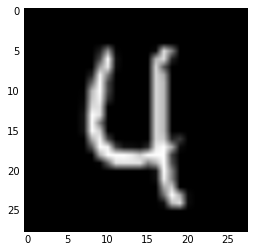

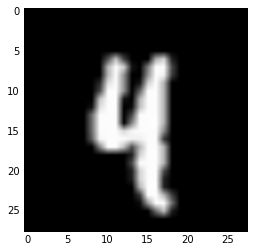

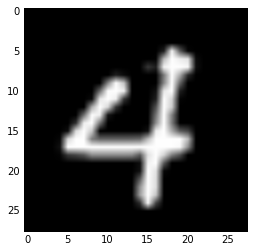

In [10]:
def P5(examples):
### STUDENT START ###

    # Inputs
    #   examples: number of examples to show of confused digits

    k_values = [1]
    knn = train_knn_model(k_values, mini_train_data, mini_train_labels)
    preds = knn.predict(dev_data)
    cm = confusion_matrix(dev_labels, preds)
    print "Confusion matrix:\n%s" % cm
   
    # Find most confused digits from confusion
    cm2 = cm
    np.fill_diagonal(cm2, 0)
    [i, j] = np.where(cm2 == np.amax(cm2))
    print "\nMost Confused Digits are: %i and %i" % (i,j)
    
    # Find indexes of examples of mistakes 
    idxs = np.where((dev_labels == i[0]) & (preds == j[0]))
    
    # dim = np.ceil(np.sqrt(examples))
    # Display a few misclasifications
    fig = plt.figure()
    for i in range(examples):
        row = np.reshape(dev_data[idxs[0][i]],(28,28))
        plt.imshow(row, cmap=plt.cm.gist_gray)
        plt.show()

examples = 3

### STUDENT END ###

P5(examples)

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

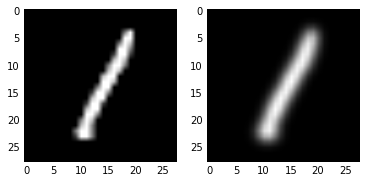

In [11]:
# Example plot with gaussian Filter 
# set inputs
sigma = 1
window = 8
t = (((window - 1)/2)-0.5)/sigma
dim = int(np.sqrt(len(mini_train_data[0])))

# Plot
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
row = mini_train_data[0]
row = np.reshape((row),(dim,dim))
result = gaussian_filter(row, sigma=sigma, mode = 'nearest', truncate = t)
ax1.imshow(row)
ax2.imshow(result)


In [12]:
def gaussian_blur_image(data, sigma, window):
    # Applies a gaussian smoothing finction to the data and returns an array or new pixel values. 
    # inputs: 
    #    data: nunpy data array with pixel values
    #    sigma: sigma value for gaussian filter
    #    window: window of pixels requested
    
    # find sigma to give neighboring pixels of size window
    t = (((window - 1)/2)-0.5)/sigma 
    
    # create array for weighted pixel values
    [l,w] = mini_train_data.shape
    dim = int(np.sqrt(w))
    data_blur = np.zeros(shape = (l,w))
    
    for idx in range(len(data)):
        row = data[idx]
        row = np.reshape((row),(dim,dim))
        row_blur = gaussian_filter(row, sigma=sigma, mode='nearest', truncate=t)
        row_blur = np.reshape(row_blur,(1,(dim*dim)))[0]
        data_blur[idx] = row_blur
    
    # Return results
    return data_blur
    

In [13]:

def P6():
    ### STUDENT START ###
    [l,w] = mini_train_data.shape
    dim = int(np.sqrt(w))
    
    # Set Parameters for filter and models
    sigma = 1
    window = 8
    k_values = [1]
    
    
    # Preprocess Blur Training Data and Dev Data sets
    mtd_blur = gaussian_blur_image(mini_train_data, sigma, window)
    dev_blur = gaussian_blur_image(dev_data, sigma, window)
    
    # Preprocess for trainig data but not Dev Data
    knn1 = train_knn_model(k_values, mtd_blur, mini_train_labels)
    preds = knn1.predict(dev_data)
    acc = np.mean(preds == dev_labels)
    cm = confusion_matrix(dev_labels, preds)
    print"\n1-KNN Results for preprocessed trianing data tested on original Dev Data"
    print"Accuracy: %0.2f" % acc

    # Preprocess the dev data but not the training data
    knn2 = train_knn_model(k_values, mini_train_data, mini_train_labels)
    preds = knn2.predict(dev_blur)
    cm = confusion_matrix(dev_labels, preds)
    acc = np.mean(preds == dev_labels)
    print"\n1-KNN Results for original trianing data tested on preprocessed Dev Data"
    print"Accuracy: %0.2f" % acc
    
    # Preprocess both training and dev data
    preds = knn1.predict(dev_blur)
    cm = confusion_matrix(dev_labels, preds)
    acc = np.mean(preds == dev_labels)
    print"\n1-KNN Results for preprocessed trianing data tested on preprocessed Dev Data"
    print"Accuracy: %0.2f" % acc


### STUDENT END ###

P6()


1-KNN Results for preprocessed trianing data tested on original Dev Data
Accuracy: 0.91

1-KNN Results for original trianing data tested on preprocessed Dev Data
Accuracy: 0.86

1-KNN Results for preprocessed trianing data tested on preprocessed Dev Data
Accuracy: 0.90


ANSWER:
See reults above

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [14]:
# Binarize Dev data for testing later
dev = pd.DataFrame(dev_data)
[l,w] = dev.shape
thresholds = np.array([0.5] * w)
dev_data_binarized = dev.apply(lambda row: row > thresholds, axis=1)

print np.unique(dev_data_binarized)
dev_data_binarized.head()

[False  True]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# choose breaks based on percentiles

# Discretize each column according to the breaks defined for multinomial classification
mini_train_data_mult = mini_train_data
pc = np.percentile(mini_train_data_mult, [33,66], axis=0)
mini_train_data_mult[mini_train_data_mult > pc[1]] = 2
mini_train_data_mult[(mini_train_data_mult > pc[0]) & (mini_train_data_mult<= pc[1])] = 1
mini_train_data_mult[mini_train_data_mult <= pc[0]] = 0


dev_data_mult = dev_data
dev_data_mult[dev_data_mult > pc[1]] = 2
dev_data_mult[(dev_data_mult > pc[0]) & (dev_data_mult <= pc[1])] = 1
dev_data_mult[dev_data_mult <= pc[0]] = 0


print "Unique Classes: "
print np.unique(mini_train_data_mult)
print np.unique(dev_data_mult)

Unique Classes: 
[ 0.  1.  2.]
[ 0.  1.  2.]


In [16]:
def P7():

    ### STUDENT START ###

    # Binary, Bernoulli NB
    # mapping the pixel values to either 0 or 1
    # Fit model with BernoulliNB binaize data threshold set to 0.5 (only 0 or 1 choice)

    bnb = BernoulliNB(binarize  = 0.5)
    bnb.fit(mini_train_data, mini_train_labels)
    # predicted_probabilities = bnb.predict_proba(dev_data_binarized)
    pred = bnb.predict(dev_data_binarized)

    correct = pred == dev_labels
    accuracy = np.mean(correct)
    print "Accuracy for Bernolli on Development Data: %1.2f" % accuracy


    # Multinomial NB
    # mapping the pixel values to 0, 1, or 2,
    mnb = MultinomialNB(alpha=1)
    mnb.fit(mini_train_data_mult, mini_train_labels)
    sc = mnb.score(dev_data_mult, dev_labels)
    print "Accuracy for Multinomial on Development Data: %1.2f" % sc

   
    ### STUDENT END ###

P7()

Accuracy for Bernolli on Development Data: 0.75
Accuracy for Multinomial on Development Data: 0.79


ANSWER:

Does the multi-class version improve the results? Why or why not?
The accuracy is precited to be only very slightly higher with the multinomial NB. The reason it is slighty higher is because with three groupings(0,1,2) there is added information about those pixels and hows intense those pixels are. It could add information in the model about edges and strong connections in neighboring pixels where as strongly colored ones would most likely be in the center of the number drawing. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

Best Params Found (Alpha) {'alpha': 0.0001}
Best Score on training data 0.820

Score on Development Data: 0.782

Accuracy when on dev data when alpha=0: 0.782 
mean: 0.09200, std: 0.00213, params: {'alpha': 0.0}

Grid Search Mean Validation Scores


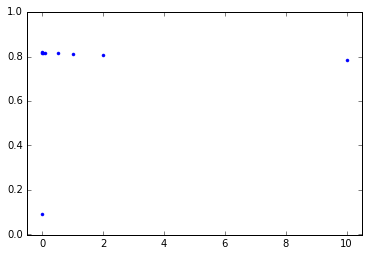

In [17]:
def P8(alphas):

### STUDENT START ###

    bnb = BernoulliNB(binarize = 0.5)
    parameter_grid = alphas
    param_searcher = GridSearchCV(bnb, parameter_grid, cv=10)
    param_searcher.fit(mini_train_data, mini_train_labels)
    
    print "Best Params Found (Alpha) %s" % param_searcher.best_params_
    print "Best Score on training data %0.3f" % param_searcher.best_score_

    # Fit model with optimal Parameters from search
    bnb_params = BernoulliNB(binarize  = 0.5, **param_searcher.best_params_)
    bnb_params.fit(mini_train_data, mini_train_labels)
    print "\nScore on Development Data: %0.3f" % bnb_params.score(dev_data_binarized, dev_labels)

    bnb_0 = BernoulliNB(binarize = 0.5, alpha = 0)
    bnb_0.fit(mini_train_data, mini_train_labels)
    print "\nAccuracy when on dev data when alpha=0: %0.3f " % bnb_params.score(dev_data_binarized, dev_labels)
    print param_searcher.grid_scores_['alpha' == 0]
    
    # plot mean vlaidation for all Alpha values
    grid_scores = pd.DataFrame(param_searcher.grid_scores_)
    grid_scores['alpha_values'] = pd.Series(alphas['alpha'])
    print "\nGrid Search Mean Validation Scores"
    plt.plot(grid_scores['alpha_values'],grid_scores['mean_validation_score'], '.')
    plt.axis([-0.5, 10.5, -0.002, 1.002])
    plt.show()

    return bnb_params
    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

ANSWER:

What is the best value for alpha? alpha =  0.01.  
What is the accuracy when alpha=0? 0.821.    
Is this what you'd expect? No, I would have expected the accuracy to be much lower than tha optimal alpha accuracy. Especially considering the mean validation score is 0.09200 but when retrained it give an accuracy comporable to the best choice alpha value. 


(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [18]:
def P9():

### STUDENT END ###
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print "Score on Dev Data %0.2f" % gnb.score(dev_data, dev_labels)

    predicted_probabilities = pd.DataFrame(gnb.predict_proba(dev_data))
    # predicted_probabilities.head()
    
    print "\nExamine Model Parameters"
    print "Class Counts %s" % gnb.class_count_
    print "Class Priors %s" % gnb.class_prior_
    print "Minimum theta values %s, Maximum theta Value %f" % (np.min(gnb.theta_), np.max(gnb.theta_))
    print "Minimum sigma values %s, Maximum Sigma Value %f" % (np.min(gnb.sigma_), np.max(gnb.sigma_))

    # TODO find solution to increase accuracy 
    # normalize data to fit in gaussian distribution better 
    print "\nNormalize Data and refit model"
    # mtd_norm = preprocessing.normalize(mini_train_data, norm='l1', axis = 1)
    # dev_norm = preprocessing.normalize(dev_data, norm='l1', axis = 1)
    gnb = GaussianNB()
    gnb.fit(mtd_norm, mini_train_labels)
    print "Score on Dev Data %0.2f" % gnb.score(dev_norm, dev_labels)
    
    
    return gnb
### STUDENT END ###

gnb = P9()

Score on Dev Data 0.60

Examine Model Parameters
Class Counts [  92.  106.  106.  112.   91.   88.  101.  101.   92.  111.]
Class Priors [ 0.092  0.106  0.106  0.112  0.091  0.088  0.101  0.101  0.092  0.111]
Minimum theta values 0.0, Maximum theta Value 1.858491
Minimum sigma values 8.976e-10, Maximum Sigma Value 1.000000

Normalize Data and refit model
Score on Dev Data 0.62


ANSWER: The sigma values fit by the gaussian model are pretty smalle - ranging from 1e-09 to 1.000000001. The other parameters seem to be normals. The class priors are fairly equal across all classes and the theat ranges are between 0 and 2. 



(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.


20 Examples of each digit


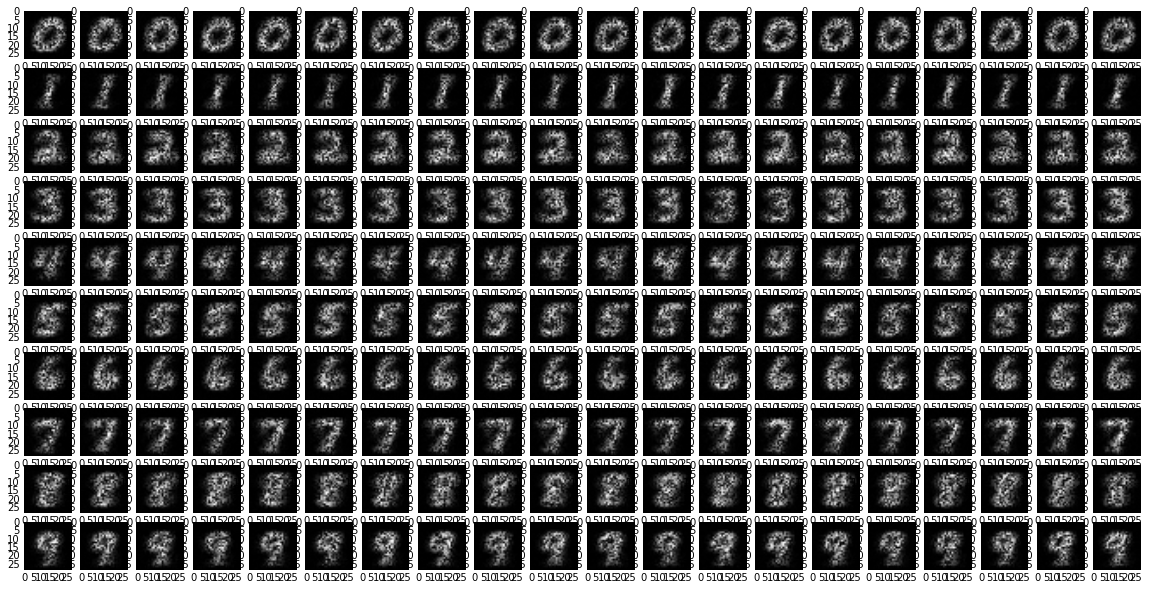

In [19]:
def P10(num_examples):

### STUDENT START ###
    # Train BernoulliNB Model
    bnb = BernoulliNB(binarize  = 0.5).fit(mini_train_data, mini_train_labels)
    feature_probs = np.exp(bnb.feature_log_prob_)
    
    # Generate matrix of examples
    possible_labels = len(np.unique(mini_train_labels))
    generated_examples = np.zeros(shape = (num_examples*possible_labels,784))
    generated_labels = np.zeros(shape = (num_examples*possible_labels,1))
    idx = 0
    for label in range(possible_labels):
        for n in range(num_examples):
            row = feature_probs[label] * np.random.rand(1,784)
            generated_examples[idx] = row
            generated_labels[idx] = int(label)
            idx += 1 
    
    # Generate 10X20 grid with 20 examples of each digit 
    print"\n%i Examples of each digit" % num_examples
    P1(num_examples, generated_examples, generated_labels)

### STUDENT END ###

P10(20)

ANSWER:
How do the generated digits compare to the training digits?
The generated digits are much more pixelated and have a lot of spots in the middle of the digit that are not represented with color. However, they are also more consistent and uniform across all examples -- meaning the structure of each digit has less varaiation than the real examples ploted above. The colors of each of the generated digits are not not as strong as the true digits for each feature. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [20]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bnb = BernoulliNB(binarize  = 0.5, alpha = 0.01)
    bnb.fit(mini_train_data, mini_train_labels)
    predicted_probabilities = bnb.predict_proba(dev_data_binarized)
    # pred = nb.predict(dev_data_binarized)

    for idx in range(len(predicted_probabilities)):
        pp_idx = predicted_probabilities[idx]
        t_idx = dev_labels[idx] # truth
        pmax = np.max(pp_idx) # probibility 
        # p_idx = pred[idx] # predicted 
        p_idx = np.where(pmax == pp_idx)[0] # predicted 
        
        # Find correct bucket to place in 
        match = pmax <= buckets
        buck = len(np.where(match == False)[0])
        
        # increase counts
        if p_idx == t_idx: 
            # increase total and correct bucket counts
            correct[buck] = correct[buck] + 1
            total[buck] = total[buck] + 1
        else: 
            # increase total bucket counts only
             total[buck] = total[buck] + 1
        
          
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / float(total[i])
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  40    accuracy = 0.350
p(pred) <= 0.9990000000000    total =  93    accuracy = 0.495
p(pred) <= 0.9999900000000    total =  76    accuracy = 0.434
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.667
p(pred) <= 0.9999999990000    total =  62    accuracy = 0.645
p(pred) <= 0.9999999999900    total =  54    accuracy = 0.778
p(pred) <= 0.9999999999999    total =  67    accuracy = 0.776
p(pred) <= 1.0000000000000    total = 545    accuracy = 0.925


ANSWER:
How would you characterize the calibration for the Naive Bayes model?
I would characterize the calibration of this Naive Bayes model to be strongy calibrated. Over 90% of the posterior probabilities are and all posterior probilities are > 0.9. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [21]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()